In [1]:
# Load trees from .csv files in trees/ directory. Each file its called <model>.csv. I want to load all of them and
# create a NN to predict the model given the tree. The model is a string (name of the file) and the trees are stored as csv (CDV format)

import os
import numpy as np
from ete3 import Tree

class TreeEncoder:

    def encode_tree(self, tree_str):
        """
        Encode the tree structure into a format suitable for input into the neural network.
        """
        # Check if the tree is already encoded
        csv_file = tree_str[:-4] + '.csv'
        if os.path.exists(csv_file):
            return csv_file
        # Call the external script to get CDV encoding
        cmd = f"python -m CDV_full_tree -t {tree_str} -f {csv_file}" # > {tree_str[:-4]}.csv"
        os.system(cmd)
        

    def encode_all_trees(self, trees_directory):
        """
        Encode all the trees in the given directory.
        """
        tree_files = [os.path.join(trees_directory, file) for file in os.listdir(trees_directory) if file.endswith('.nwk')]
        for tree_file in tree_files:
            print(tree_file)
            self.encode_tree(tree_file)

In [2]:
import sys

trees_directory = "trees/"

encoder = TreeEncoder()
encoder.encode_all_trees(trees_directory)

trees/bd.nwk
trees/bisse.nwk
trees/bisseness.nwk
trees/classe.nwk
trees/classe_2.nwk
trees/geosse.nwk
trees/musse.nwk
trees/musse_90k.nwk
trees/quasse.nwk


In [4]:
import pandas as pd

trees = []
target = []

models = ["bd",
          "bisse",
          "bisseness",
          "classe_2",
          "geosse"
          #"musse",
          #"quasse"
          ]

for model_name in models:
    encoding = pd.read_csv(trees_directory + model_name + '.csv', sep='\t', header=None, skiprows=0, index_col=0)
    trees.append(encoding)
    target.append([model_name] * len(encoding))
    
assert len(trees) == len(target)

print("Number of trees per model:")
for model, tree in zip(models, trees):
    print(f"{model}: {len(tree)}")
    
# Concatenate all the trees and targets
trees = pd.concat(trees)
target = np.concatenate(target)

print("Number of trees in total:", len(trees))
print("Number of targets in total:", len(target))

trees

Number of trees per model:
bd: 2964
bisse: 2415
bisseness: 241
classe_2: 7580
geosse: 6650
Number of trees in total: 19850
Number of targets in total: 19850


,1,2,3,4,5,6,7,8,9,10,...,993,994,995,996,997,998,999,1000,1001,1002
0,,,,,,,,,,,,,,,,,,,,,
0,13.975176,13.041968,13.591479,13.794207,13.001776,13.213374,12.199373,13.930781,11.732213,11.134086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.599156
1,8.012841,6.149481,5.708792,6.178136,7.791805,4.613272,3.817847,7.059666,7.898457,7.967581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.770129
2,18.280376,15.809396,15.670503,17.693003,17.110394,16.115005,17.440034,15.827314,17.977755,15.295922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.591183
3,17.996226,17.783270,17.744065,17.712306,17.127398,16.715255,16.365283,17.615009,17.236252,16.256012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990354
4,5.910599,2.840898,4.631535,5.868371,4.553909,5.910599,0.000000,5.384971,4.906543,1.557961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,11.717041,10.839920,10.732443,10.007157,10.662059,11.688865,10.518191,11.435055,9.996981,9.371546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441024
6646,12.295280,10.143172,11.962931,10.079968,11.079703,12.194992,11.008393,11.971026,9.645957,10.861073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531908
6647,4.903388,2.298750,3.929849,4.903388,1.879435,3.124330,0.024436,4.414232,0.000000,3.248903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461670


In [5]:
target

array(['bd', 'bd', 'bd', ..., 'geosse', 'geosse', 'geosse'], dtype='<U9')

In [6]:
# Save the data
trees.to_csv("trees.csv")
np.save("target.npy", target)

In [7]:
# Load the data
trees = pd.read_csv("trees.csv", index_col=0)
target = np.load("target.npy")

In [8]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trees, target, test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Train an advanced model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


              1          2          3          4          5          6  \
0                                                                        
204    6.421973   5.353103   6.228624   6.122902   6.060616   4.897261   
3891  17.355726  15.706105  15.401995  14.912773  16.296778  16.831578   
5127   5.990399   4.519932   4.218128   4.697551   4.147066   5.787314   
1866  14.250627  12.330734  13.736611  12.041528  12.359942  14.163842   
1797  14.208133  12.460801  12.195871  13.084303  14.081940  11.536949   
...         ...        ...        ...        ...        ...        ...   
5664   7.910284   7.252340   6.614407   6.325394   5.831626   5.739176   
6344  13.933514  13.211118  13.163795  12.223272  11.186996  11.137555   
11    10.058587   7.139218   6.689888   7.262691   9.908998   9.897316   
860    6.512532   4.005206   3.667830   3.558562   4.228271   5.553265   
2595  10.882956   8.832651   9.927155  10.490547   8.608368  10.441722   

              7          8          9

In [9]:
#  Save the model
import pickle

with open("forest" + str(int((accuracy)*100)) + ".pkl", "wb") as f:
    pickle.dump(model, f)

In [10]:
# Create another NN model
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5183879093198992


In [11]:
# Create a DNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

def create_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, input_shape=(input_shape,), activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

c:\Users\matti\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\matti\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\matti\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\matti\AppD

In [12]:
# build the model

# convert the target to integers
from sklearn.preprocessing import LabelEncoder
target_int = LabelEncoder().fit_transform(target)
print(target_int)
print(len(set(target_int)))

model = create_model(X_train.shape[1], len(set(target_int)))
model.summary()

Y_train = LabelEncoder().fit_transform(y_train)
# train the model and save the history
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)

# save the model
model.save("dnn" + str(int((accuracy)*100)) + ".h5")

[0 0 0 ... 4 4 4]
5
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               100300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 121,005
Trainable params: 121,005
Non-trainable params: 0
_________________________________________________________________
Train on 12704 samples, validate on 3176 samples
Epoch 1/100
12704/12704 [==============================] - 1s 73us/sample - loss: 1.5747 - acc: 0.3458 - val_loss: 1.3816 - val

3970/3970 [==============================] - 0s 26us/sample - loss: 1.3897 - acc: 0.4257
Accuracy: 0.4256927


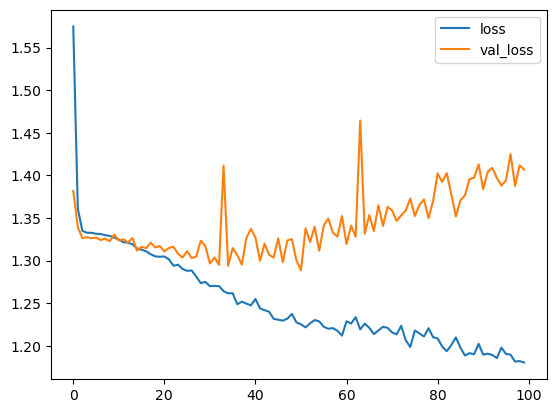

In [13]:
Y_test = LabelEncoder().fit_transform(y_test)
# evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy:", accuracy)

# Plot the model loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()